In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_score

from pathlib import Path
import json
import warnings
warnings.filterwarnings('ignore')

import sys
import os
sys.path.append("/zhouxibin/workspaces/mutations")
from utils.rank import rank_strategy_dictionary
from utils.model import model_name_library
from utils.pipeline import read_sequence
from utils.metrics import read_dms_file

In [3]:
results_auc_df = pd.read_csv("./5_data/results_auc_df.csv")

In [4]:
best_auc_df = results_auc_df[(results_auc_df["model_name"] == "esm2_t33_650M_UR50D") & (results_auc_df["rank_strategy"] == "esm1v_5")]
# find the best auc_score
best_auc_df = best_auc_df.sort_values(by="auc_score", ascending=False)
best_auc_df.head()

,sequence_name,model_name,rank_strategy,fpr,tpr,threshold,auc_score,wt_fitness
77596,2MKX.pdb,esm2_t33_650M_UR50D,esm1v_5,[0. 0. 0. 0.00189394 0...,[0. 0.00280899 0.00561798 0.00561798 0...,[ 2.30365396 1.30365396 0.11621404 0. ...,0.890689,5.319625
20938,1W4E.pdb,esm2_t33_650M_UR50D,esm1v_5,[0. 0. 0. 0.00603318 0...,[0. 0.00628931 0.03144654 0.03144654 0...,[ 2.89538193 1.89538193 0.22543001 -1.25...,0.836355,3.896175
16042,HHH_rd1_0197.pdb,esm2_t33_650M_UR50D,esm1v_5,[0. 0. 0.00137931 0.00137931 0...,[0. 0.01333333 0.01333333 0.10666667 0...,[ 1.87222183 0.87222183 0. -1.66...,0.833526,4.088323
54892,2M9F.pdb,esm2_t33_650M_UR50D,esm1v_5,[0. 0. 0. 0.01136364 0...,[0. 0.01428571 0.07142857 0.07142857 0...,[ 3.01909447 2.01909447 0.64623356 -0.59...,0.829789,3.046169
61750,HHH_rd4_0125.pdb,esm2_t33_650M_UR50D,esm1v_5,[0. 0. 0.00283286 0.00283286 0...,[0. 0.0106383 0.0106383 0.0212766 0...,[ 1.42570972 0.42570972 0. -0.16...,0.825191,4.149158


In [6]:
results_auc_df[results_auc_df["sequence_name"] == "2MKX.pdb"]

,sequence_name,model_name,rank_strategy,fpr,tpr,threshold,auc_score,wt_fitness
77466,2MKX.pdb,esm1_t34_670M_UR50S,esm1v_1,[0. 0.00189394 0.01515152 0.01515152 0...,[0. 0. 0. 0.00561798 0...,[ 3.1077888 2.1077888 1.58270812 1.481716...,0.510864,5.319625
77467,2MKX.pdb,esm1_t34_670M_UR50S,esm1v_2,[0. 0. 0. 0.00189394 0...,[0. 0.00280899 0.03370787 0.03370787 0...,[ 5.70564318e+00 4.70564318e+00 1.40447259e+...,0.839542,5.319625
77468,2MKX.pdb,esm1_t34_670M_UR50S,esm1v_3,[0. 0. 0. 0.00189394 0...,[0. 0.00280899 0.01685393 0.01685393 0...,[ 4.29802942 3.29802942 1.46996403 1.44...,0.895323,5.319625
77469,2MKX.pdb,esm1_t34_670M_UR50S,esm1v_4,[0. 0.00189394 0.00378788 0.00378788 0...,[0. 0. 0. 0.00561798 0...,[ 5.89565611e+00 4.89565611e+00 3.44282269e+...,0.796151,5.319625
77470,2MKX.pdb,esm1_t34_670M_UR50S,esm1v_5,[0. 0. 0. 0.00189394 0...,[0. 0.00280899 0.04213483 0.04213483 0...,[ 4.63515949e+00 3.63515949e+00 8.28044057e-...,0.878564,5.319625
...,...,...,...,...,...,...,...,...
77600,2MKX.pdb,esm2_t36_3B_UR50D,esm1v_4,[0. 0. 0. 0.00189394 0...,[0. 0.00280899 0.00842697 0.00842697 0...,[ 7.93277454e+00 6.93277454e+00 6.16795444e+...,0.856837,5.319625
77601,2MKX.pdb,esm2_t36_3B_UR50D,esm1v_5,[0. 0. 0. 0.00189394 0...,[0. 0.00280899 0.00561798 0.00561798 0...,[ 1.41138166 0.41138166 0.16391385 0. ...,0.867882,5.319625
77602,2MKX.pdb,esm2_t48_15B_UR50D,esm1v_1,[0. 0. 0.01136364 0.01136364 0...,[0. 0.00280899 0.00280899 0.00842697 0...,[ 6.42088747e+00 5.42088747e+00 3.46671057e+...,0.389412,5.319625
77603,2MKX.pdb,esm2_t48_15B_UR50D,esm1v_4,[0. 0.00189394 0.00378788 0.00378788 0...,[0. 0. 0. 0.02247191 0...,[ 9.22490978e+00 8.22490978e+00 8.22468472e+...,0.812872,5.319625


In [47]:
_df = results_auc_df.groupby(["model_name", "rank_strategy"])["fpr", "tpr", "threshold"].aggregate(lambda x: x.values.tolist()).reset_index()
def from_str_get_list(x):
    x = x[1:-1]
    x = x.split(" ")
    return [float(i.strip()) for i in x if i != ""]
best_df = _df[(_df["model_name"] == "esm2_t33_650M_UR50D") & (_df["rank_strategy"] == "esm1v_5")]
best_fprs = [from_str_get_list(i) for i in best_df["fpr"].values[0]]
best_tprs = [from_str_get_list(i) for i in best_df["tpr"].values[0]]
best_thresholds = [from_str_get_list(i) for i in best_df["threshold"].values[0]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


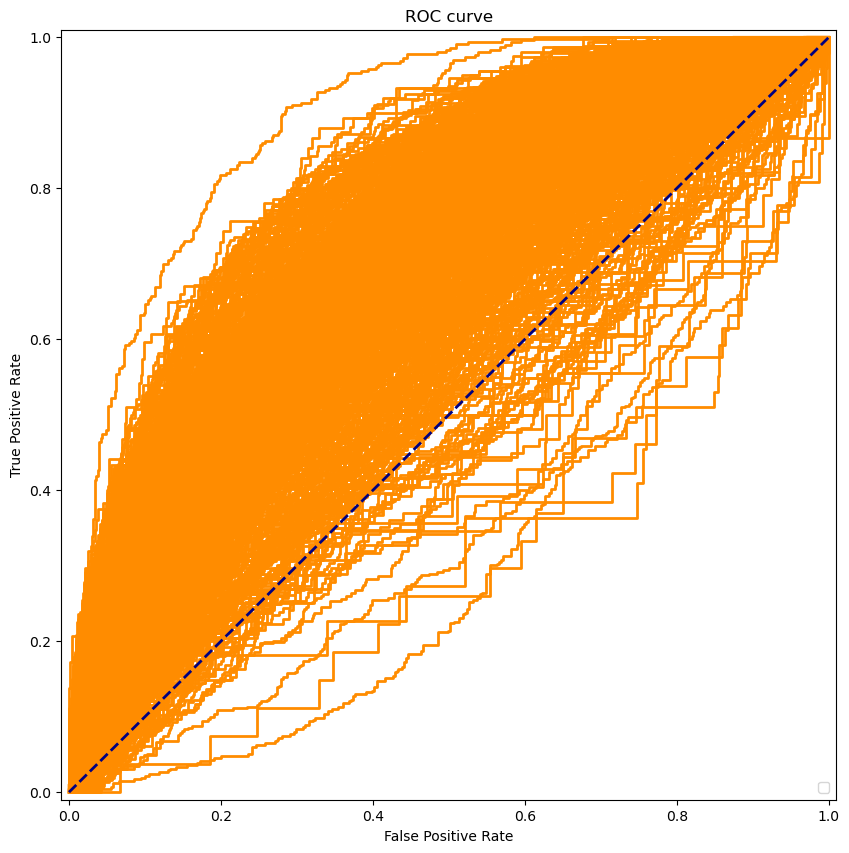

In [49]:
# plot ROC
plt.figure(figsize=(10, 10))
lw = 2
for best_fpr, best_tpr in zip(best_fprs, best_tprs):
    plt.plot(best_fpr, best_tpr, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve")
plt.legend(loc="lower right")
# plt.show()

In [7]:
for fpr, tpr, threshold in temp:
    print(fpr)
    # print(fpr, tpr, threshold)
    break

SyntaxError: invalid syntax (<string>, line 1)